In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load CSV file into a Pandas DataFrame
df = pd.read_csv("C:\\6 Months Data Scienctist Job\\Week 2 - Study topic\\Project Week 2\\Covid Data.csv")

# Display the first few rows of the dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
# Display column names
print(df.columns)

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+

In [9]:
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [10]:
df.rename(columns={'DATE_DIED': 'date'}, inplace=True)  # Replace 'Date' with the actual column name

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify if conversion was successful
print(df[['date']].head())

        date
0 2020-03-05
1 2020-03-06
2 2020-09-06
3 2020-12-06
4        NaT


In [13]:
df = df.dropna(subset=['date'])

In [14]:
print(df.dtypes)  # Check if 'date' is now in datetime format

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
date                    datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                         int64
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
dtype: object


In [16]:
# Check unique values in CLASIFFICATION_FINAL
print(df['CLASIFFICATION_FINAL'].unique())

# Filter for confirmed COVID-19 cases
df_covid = df[df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]  # Assuming 1,2,3 indicate confirmed cases

# Display the number of cases
print(f"Total confirmed cases: {len(df_covid)}")

[3 5 7 6 4 2 1]
Total confirmed cases: 21281


In [18]:
# Assume infection happened 14 days before death
df_covid['ESTIMATED_INFECTION_DATE'] = df_covid['date'] - pd.Timedelta(days=14)

# Drop NaT values (cases where death date is unknown)
df_covid = df_covid.dropna(subset=['ESTIMATED_INFECTION_DATE'])

C:\Users\primu\AppData\Local\Temp\ipykernel_5660\3921190440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['ESTIMATED_INFECTION_DATE'] = df_covid['date'] - pd.Timedelta(days=14)


In [19]:
# Group by estimated infection date
daily_cases = df_covid.groupby('ESTIMATED_INFECTION_DATE').size().reset_index(name='cases')

# Sort by date
daily_cases = daily_cases.sort_values(by='ESTIMATED_INFECTION_DATE')

# Display first few rows
daily_cases.head()

,ESTIMATED_INFECTION_DATE,cases
0,2019-12-21,19
1,2019-12-22,340
2,2019-12-23,619
3,2019-12-24,640
4,2019-12-25,109


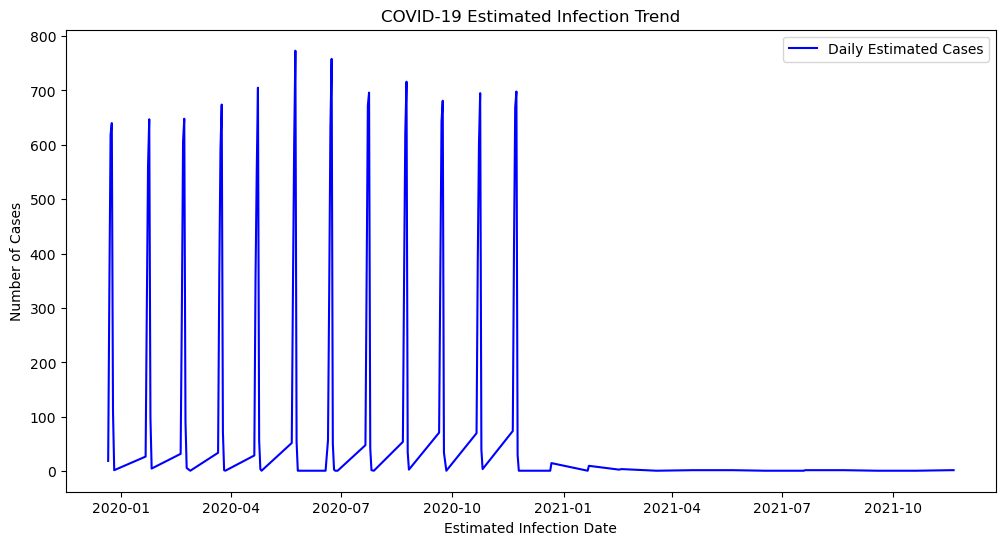

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cases, x='ESTIMATED_INFECTION_DATE', y='cases', color="blue", label="Daily Estimated Cases")
plt.xlabel("Estimated Infection Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Estimated Infection Trend")
plt.legend()
plt.show()

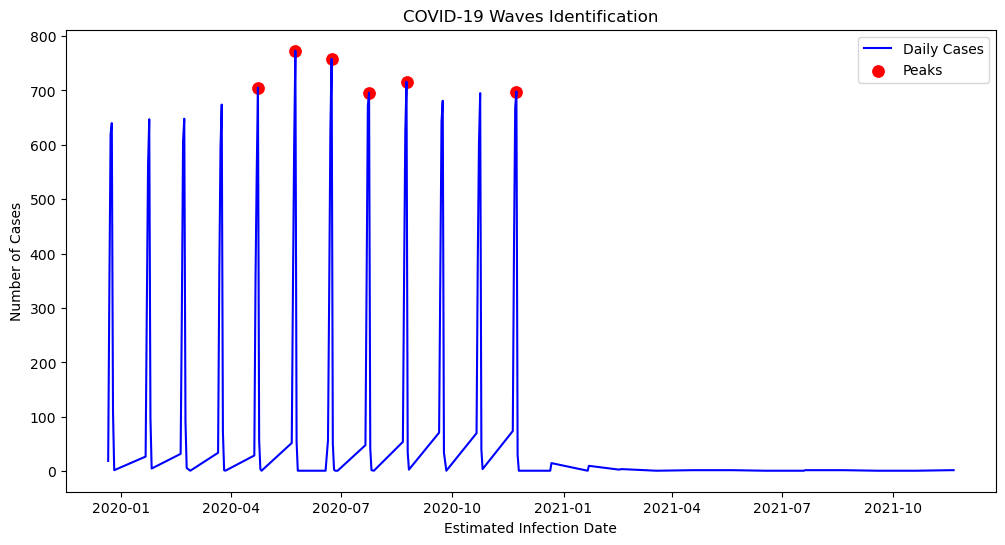

In [21]:
# Identify peak infection dates
peaks = daily_cases[daily_cases['cases'] > daily_cases['cases'].quantile(0.95)]  # Top 5% of case days

# Mark peaks in the graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cases, x='ESTIMATED_INFECTION_DATE', y='cases', color="blue", label="Daily Cases")
sns.scatterplot(data=peaks, x='ESTIMATED_INFECTION_DATE', y='cases', color="red", label="Peaks", s=100)
plt.xlabel("Estimated Infection Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Waves Identification")
plt.legend()
plt.show()

In [27]:
#"C:\6 Months Data Scienctist Job\Week 2 - Study topic\Project Week 2\day_wise.csv"
import pandas as pd

# Load the external dataset
df_external = pd.read_csv("C:\\6 Months Data Scienctist Job\\Week 2 - Study topic\\Project Week 2\\day_wise.csv")

# Convert 'Date' column to datetime format
df_external['Date'] = pd.to_datetime(df_external['Date'])

# Display column names and first few rows
print(df_external.columns)
df_external.head()

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [25]:
print(df_external.columns)

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')


In [29]:
    # Load the Kaggle COVID-19 dataset (patient records)
df_covid = pd.read_csv("C:\\6 Months Data Scienctist Job\\Week 2 - Study topic\\Project Week 2\\Covid Data.csv")

# Display column names to verify
print(df_covid.columns)
df_covid.head()

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [30]:
# Convert 'DATE_DIED' to datetime
df_covid['DATE_DIED'] = pd.to_datetime(df_covid['DATE_DIED'], errors='coerce')

# Filter only confirmed cases (Assuming CLASIFFICATION_FINAL: 1,2,3 are confirmed)
df_covid = df_covid[df_covid['CLASIFFICATION_FINAL'].isin([1, 2, 3])]

In [31]:
# Rename 'Date' column in external dataset for clarity
df_external.rename(columns={'Date': 'REPORT_DATE'}, inplace=True)

# Merge datasets on 'REPORT_DATE'
df_merged = df_external.merge(df_covid, how="left", left_on="REPORT_DATE", right_on="DATE_DIED")

# Drop extra columns
df_merged.drop(columns=['DATE_DIED'], inplace=True)

# Fill missing values
df_merged.fillna(0, inplace=True)

# Display merged dataset
df_merged.head()

,REPORT_DATE,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


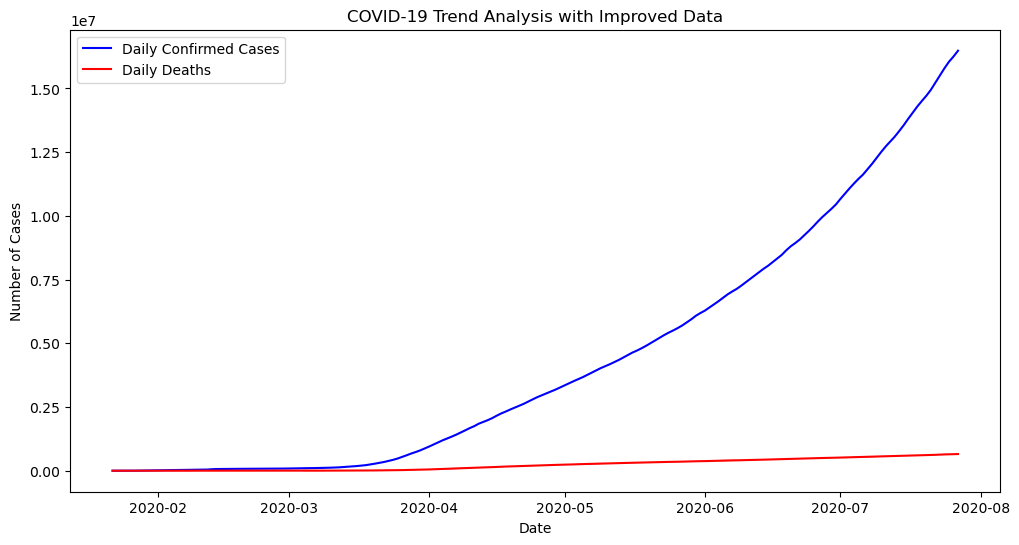

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='REPORT_DATE', y='Confirmed', color="blue", label="Daily Confirmed Cases")
sns.lineplot(data=df_merged, x='REPORT_DATE', y='Deaths', color="red", label="Daily Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Trend Analysis with Improved Data")
plt.legend()
plt.show()

In [33]:
print(df_merged.columns)

Index(['REPORT_DATE', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries',
       'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


# 1️⃣ Time-Series Trends: Confirmed vs Deaths vs Recoveries

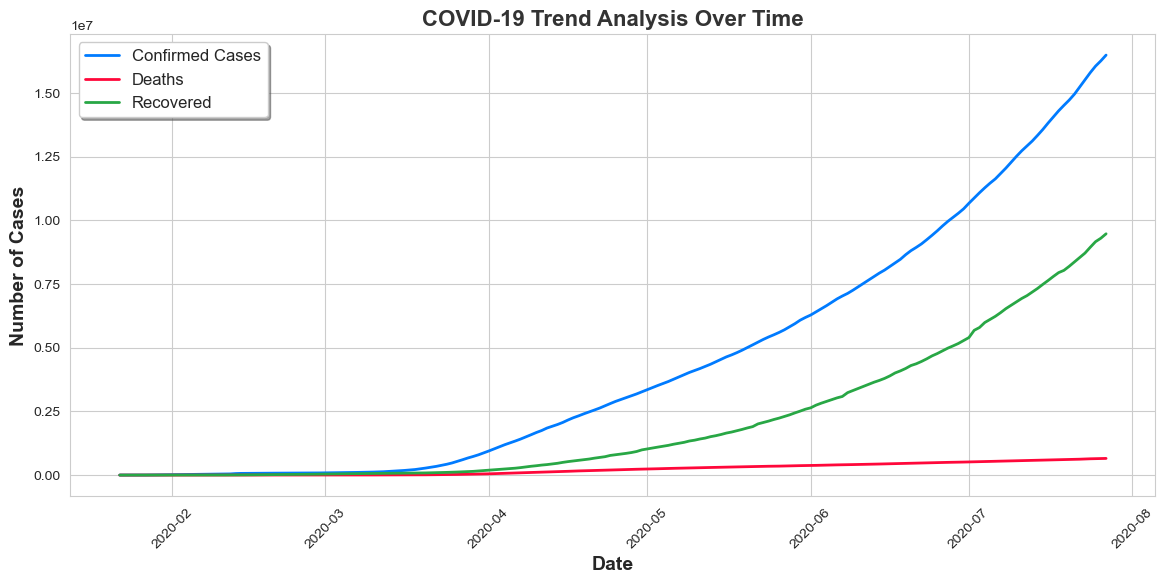

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot Confirmed Cases
sns.lineplot(data=df_merged, x='REPORT_DATE', y='Confirmed', color="#007BFF", label="Confirmed Cases", linewidth=2)

# Plot Deaths
sns.lineplot(data=df_merged, x='REPORT_DATE', y='Deaths', color="#FF073A", label="Deaths", linewidth=2)

# Plot Recoveries
sns.lineplot(data=df_merged, x='REPORT_DATE', y='Recovered', color="#28A745", label="Recovered", linewidth=2)

# Customization
plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Number of Cases", fontsize=14, fontweight="bold")
plt.title("COVID-19 Trend Analysis Over Time", fontsize=16, fontweight="bold", color="#333333")
plt.xticks(rotation=45)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True)
plt.show()

#    2️⃣ Daily New Cases, Deaths & Recoveries with Area Plot

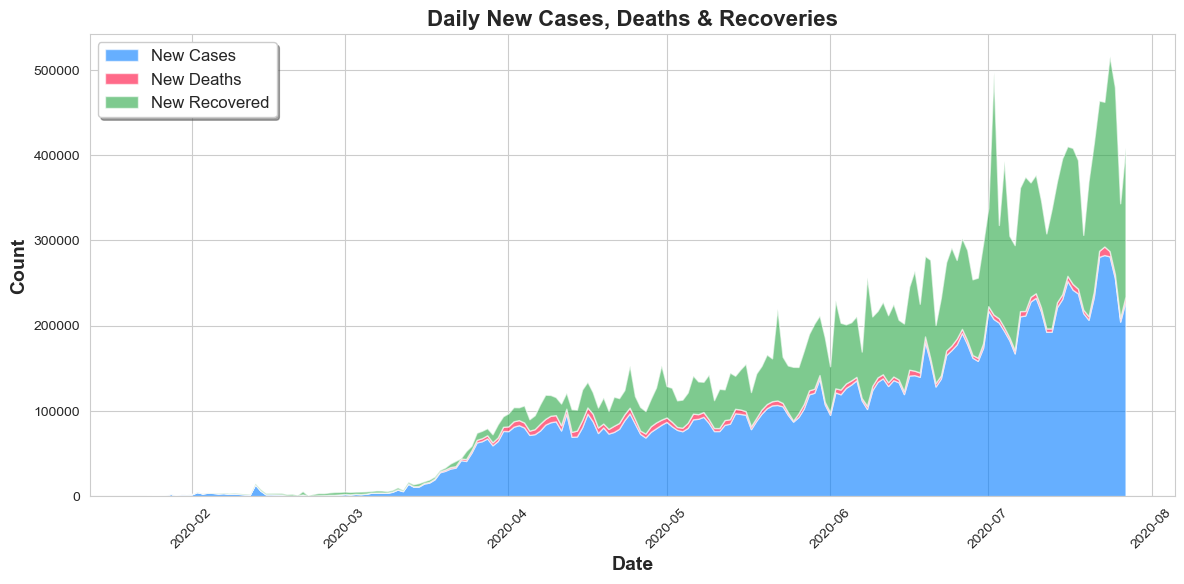

In [35]:
plt.figure(figsize=(14, 6))
plt.stackplot(df_merged['REPORT_DATE'], df_merged['New cases'], df_merged['New deaths'], df_merged['New recovered'], 
              labels=['New Cases', 'New Deaths', 'New Recovered'], colors=["#007BFF", "#FF073A", "#28A745"], alpha=0.6)

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Daily New Cases, Deaths & Recoveries", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True)
plt.show()

# 3️⃣ Heatmap of Cases Across Time

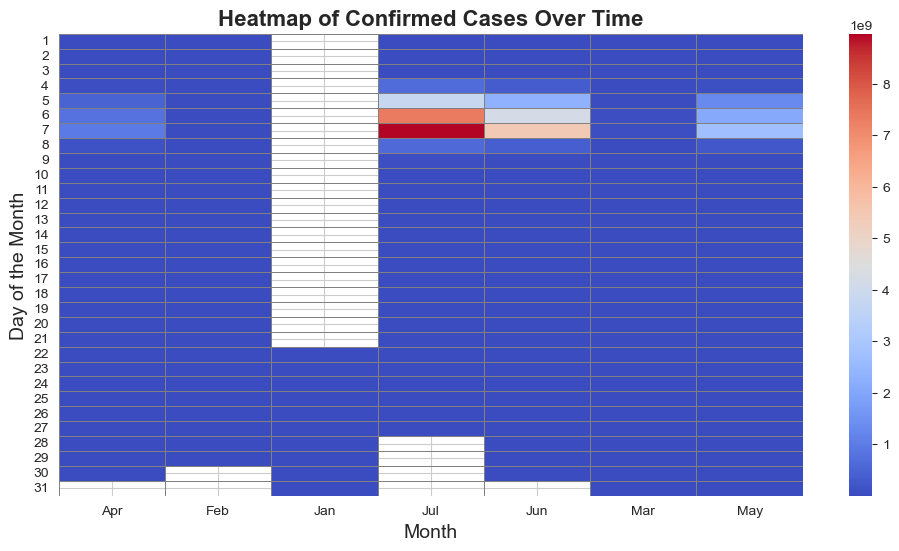

In [36]:
import numpy as np

# Extract month & day to analyze patterns
df_merged['Month'] = df_merged['REPORT_DATE'].dt.strftime('%b')
df_merged['Day'] = df_merged['REPORT_DATE'].dt.day

# Pivot for heatmap
heatmap_data = df_merged.pivot_table(index="Day", columns="Month", values="Confirmed", aggfunc=np.sum)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=False, cbar=True)

plt.title("Heatmap of Confirmed Cases Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Day of the Month", fontsize=14)
plt.show()

# 4️⃣ Cases Breakdown by Country

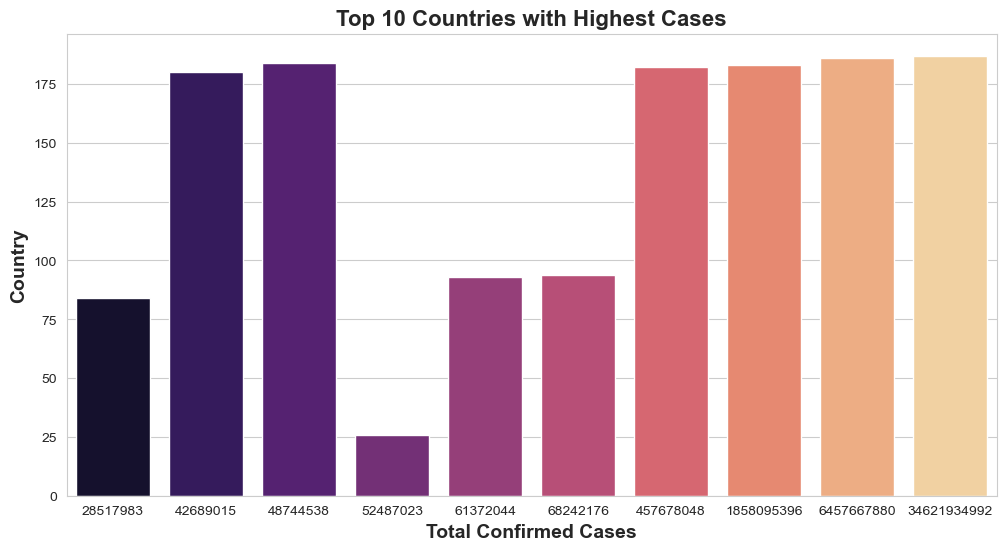

In [37]:
top_countries = df_merged.groupby("No. of countries")["Confirmed"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")

plt.xlabel("Total Confirmed Cases", fontsize=14, fontweight="bold")
plt.ylabel("Country", fontsize=14, fontweight="bold")
plt.title("Top 10 Countries with Highest Cases", fontsize=16, fontweight="bold")
plt.show()

# 5️⃣ Deaths vs Recoveries: Scatter Plot

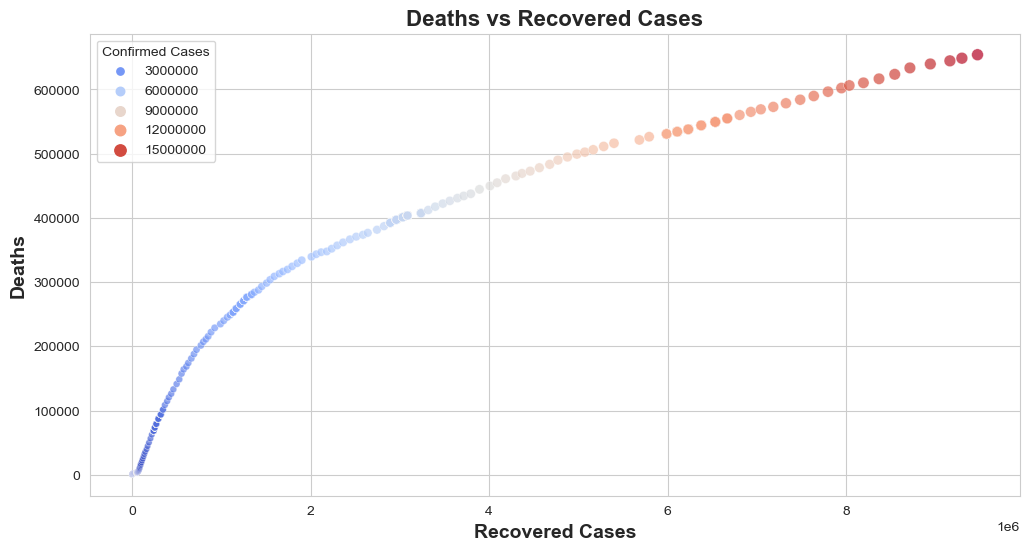

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='Recovered', y='Deaths', size='Confirmed', hue='Confirmed', palette="coolwarm", alpha=0.7)

plt.xlabel("Recovered Cases", fontsize=14, fontweight="bold")
plt.ylabel("Deaths", fontsize=14, fontweight="bold")
plt.title("Deaths vs Recovered Cases", fontsize=16, fontweight="bold")
plt.legend(title="Confirmed Cases", fontsize=10)
plt.show()

# Building ML Models to Predict Future COVID-19 Cases

# 1️⃣ Linear Regression

In [39]:
#Data Pre processing for ML Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'REPORT_DATE' to datetime
df_merged['REPORT_DATE'] = pd.to_datetime(df_merged['REPORT_DATE'])

# Prepare data
df_timeseries = df_merged[['REPORT_DATE', 'Confirmed']].copy()

# Convert Date to numerical format for ML models
df_timeseries['Days'] = (df_timeseries['REPORT_DATE'] - df_timeseries['REPORT_DATE'].min()).dt.days

# Split into training and test sets
X = df_timeseries[['Days']]
y = df_timeseries['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\primu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


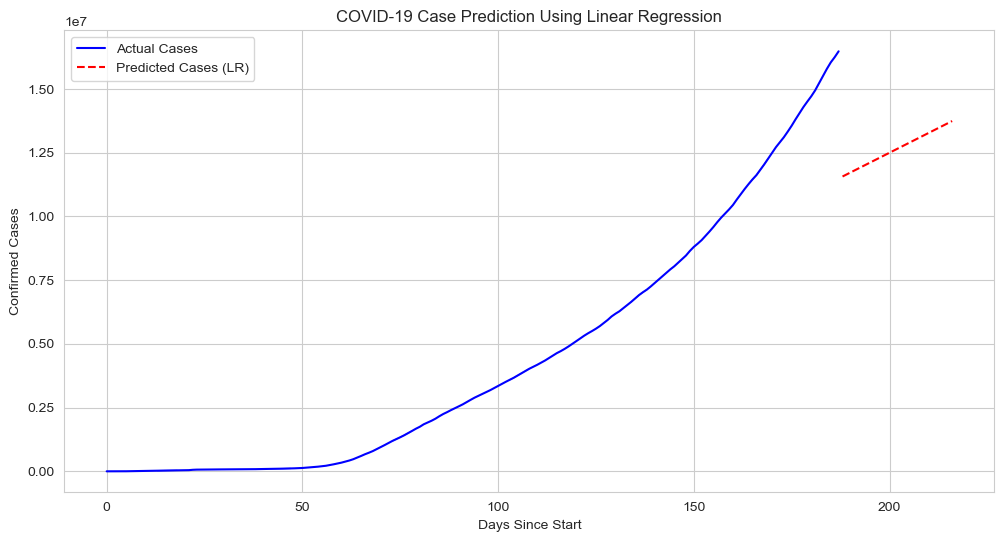

In [40]:
# Train Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict future cases
future_days = np.array(range(X.max()[0] + 1, X.max()[0] + 30)).reshape(-1, 1)
future_predictions = model_lr.predict(future_days)

# Plot results
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_timeseries['Days'], y=df_timeseries['Confirmed'], label="Actual Cases", color="blue")
sns.lineplot(x=future_days.flatten(), y=future_predictions, label="Predicted Cases (LR)", color="red", linestyle="dashed")
plt.xlabel("Days Since Start")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Case Prediction Using Linear Regression")
plt.legend()
plt.show()

# 2️⃣ ARIMA (AutoRegressive Integrated Moving Average)

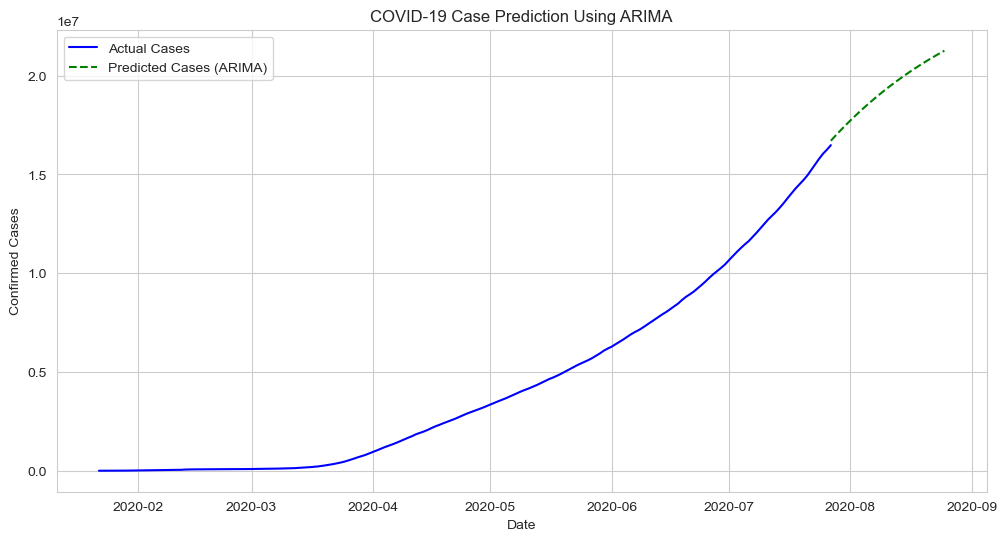

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(df_timeseries['Confirmed'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast = model_arima_fit.forecast(steps=30)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries['REPORT_DATE'], df_timeseries['Confirmed'], label="Actual Cases", color="blue")
plt.plot(pd.date_range(start=df_timeseries['REPORT_DATE'].max(), periods=30, freq='D'), forecast, label="Predicted Cases (ARIMA)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Case Prediction Using ARIMA")
plt.legend()
plt.show()

# 3️⃣ LSTM (Long Short-Term Memory Neural Network)

Epoch 1/20


C:\Users\primu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 36129164230656.0000
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34498779545600.0000
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34206438653952.0000
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32504127946752.0000
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29472757645312.0000
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25701340151808.0000
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22804114178048.0000
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22254182203392.0000
Epoch 9/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18565470093312.0000
Epoch 10/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14461964386304.0000
Epoch 11/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10786351087616.0000
Epoch 12/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8054705750016.0000
Epoch 13/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

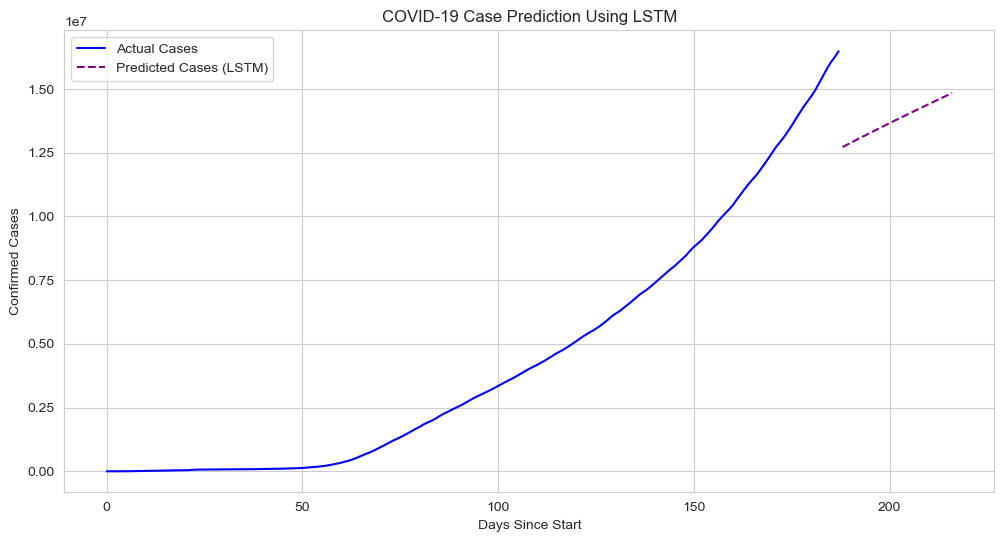

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
X_lstm = np.array(X_train).reshape(-1, 1, 1)
y_lstm = np.array(y_train)

# Build LSTM Model
model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1,1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# Train model
model_lstm.fit(X_lstm, y_lstm, epochs=20, verbose=1)

# Predict future cases
future_predictions_lstm = model_lstm.predict(np.array(future_days).reshape(-1,1,1))

# Plot results
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_timeseries['Days'], y=df_timeseries['Confirmed'], label="Actual Cases", color="blue")
sns.lineplot(x=future_days.flatten(), y=future_predictions_lstm.flatten(), label="Predicted Cases (LSTM)", color="purple", linestyle="dashed")
plt.xlabel("Days Since Start")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Case Prediction Using LSTM")
plt.legend()
plt.show()

# Dashboard Integration Using Streamlit

In [43]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset directly
@st.cache_data
def load_data():
    # Assuming df_merged is your final dataset from the previous steps
    return df_merged.copy()

df = load_data()

# Convert 'REPORT_DATE' to datetime if not already converted
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])

# Title
st.title("COVID-19 Trend Analysis & Prediction Dashboard")

# Sidebar options
view = st.sidebar.selectbox("Select a View", ["Overview", "Predictions"])

# Overview Section
if view == "Overview":
    st.header("COVID-19 Cases Over Time")

    # Line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df['REPORT_DATE'], y=df['Confirmed'], color="blue", label="Confirmed Cases")
    sns.lineplot(x=df['REPORT_DATE'], y=df['Deaths'], color="red", label="Deaths")
    sns.lineplot(x=df['REPORT_DATE'], y=df['Recovered'], color="green", label="Recovered")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.title("COVID-19 Case Trends")
    plt.legend()
    st.pyplot(plt)

# Predictions Section
elif view == "Predictions":
    st.header("Future COVID-19 Predictions")
    
    # Assuming predictions are stored in df_future_predictions
    df_future_predictions = df[['REPORT_DATE', 'Confirmed']].copy()
    
    # Generate simple predictions for demo purposes
    df_future_predictions['Predicted_Cases'] = df_future_predictions['Confirmed'].shift(-1) * 1.05  # Simple 5% growth assumption

    # Line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df_future_predictions['REPORT_DATE'], y=df_future_predictions['Predicted_Cases'], 
                 color="purple", linestyle="dashed", label="Predicted Cases")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.title("Future COVID-19 Cases")
    plt.legend()
    st.pyplot(plt)

st.sidebar.text("Dashboard by Your Name")

ModuleNotFoundError: No module named 'streamlit'

In [1]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/eb/17/fc425e1d4d86e31b2aaf0812a2ef2163763a0670d671720c7c36e8679323/streamlit-1.44.1-py3-none-any.whl.metadata
  Using cached streamlit-1.44.1-py3-none-any.whl.metadata (8.9 kB)
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/72/76/20fa66124dbe6be5cafeb312ece67de6b61dd91a0247d1ea13db4ebb33c2/cachetools-5.5.2-py